# Created in this Notebook:

** P(NonDefault | race) **
- ProbNonDefaultGivenRace

** P(NonDefault | Score=x, race) **
- ProbNonDefaultGivenScoreEqualsXAndRace

** P(Default | Score=x, race) **
- ProbDefOrNotGivenScoreEqualsXAndRace

** P(race) **
- ProbOfBeingRace

** P(Score=x | race) **
- ProbScoreEqualsXGivenRace

** P(score=x & good & race) **
- ProbScoreEqualsXAndGoodAndRace

** P(NonDefault & race) **
- ProbNonDefaultAndRace

** P(Score=x | NonDefault, race) **
- ProbScoreEqualsXGivenNonDefaultAndRace

** P(Score>=x | NonDefault, race) **
- ProbScoreGreaterThanXGivenNonDefaultAndRace
- to obtain this, I calculated:
    - <b>P(score=x & NonDefault & race)</b>
    - <b>P(race & score=x) </b>
    - <b>P(NonDefault and race)</b>

** P(NonDefault | Score=>x, race) **
- ProbNonDefaultGivenScoreGreaterXAndRace
- This is supposed to yield the same results that ProbLoanReceiverIsGood.csv did
- Small rounding errors are causing this dataset to create different final results - unsure the cause

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

### Figure 3A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables3.htm#d3A
    
### Figure 7A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables7.htm#d7A

### Figure 6A:
https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables6.htm#d6A

In [75]:
# Figure 7A-fixed is the same as Figure 7A I just changed the column names from good/bad to default/nondefault
CumulativePercentageByDefaulters = pd.read_csv("Figure7A-fixed.csv")
CumulativePercentageByDemographic = pd.read_csv("Figure3A.csv")
ProbDefaultGivenScoreEqualsX = pd.read_csv("Figure6A.csv")

In [76]:
ProbDefaultGivenScoreEqualsX.set_index("Score", inplace=True)

In [77]:
NewProbNonDefaultGivenScoreEqualsX = 1 - (ProbDefaultGivenScoreEqualsX / 100)

In [78]:
ProbDefOrNotGivenScoreEqualsXAndRace.head()

,"P(NonDefault|Score=x, White)","P(Default|Score=x, White)","P(NonDefault|Score=x, Black)","P(Default|Score=x, Black)","P(NonDefault|Score=x, Hispanic)","P(Default|Score=x, Hispanic)","P(NonDefault|Score=x, Asian)","P(Default|Score=x, Asian)"
Score,,,,,,,,
0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
0.5,0.000000,1.000000,0.005191,0.994809,0.021042,0.978958,0.000000,1.000000
1.0,0.022332,0.977668,0.025054,0.974946,0.011400,0.988600,0.058622,0.941378
1.5,0.023809,0.976191,0.021218,0.978782,0.000000,1.000000,0.000000,1.000000
2.0,0.036810,0.963190,0.023518,0.976482,0.025943,0.974057,0.101215,0.898785


In [81]:
CumulativePercentageByDefaulters.head()

,Score,White (NonDefault),White (Default),Black (NonDefault),Black (Default),Hispanic (NonDefault),Hispanic (Default),Asian (NonDefault),Asian (Default)
0,0.0,0.00,0.04,0.00,0.12,0.00,0.03,0.00,0.00
1,0.5,0.00,1.21,0.02,2.00,0.02,1.17,0.00,0.75
2,1.0,0.03,5.15,0.37,8.68,0.06,5.42,0.06,4.62
3,1.5,0.04,6.38,0.45,10.49,0.06,6.75,0.06,5.58
4,2.0,0.06,7.95,0.56,12.73,0.10,8.59,0.09,6.65


In [88]:
CumulativePercentageByDefaulters.head()

,Score,White (NonDefault),White (Default),Black (NonDefault),Black (Default),Hispanic (NonDefault),Hispanic (Default),Asian (NonDefault),Asian (Default)
0,0.0,0.00,0.04,0.00,0.12,0.00,0.03,0.00,0.00
1,0.5,0.00,1.21,0.02,2.00,0.02,1.17,0.00,0.75
2,1.0,0.03,5.15,0.37,8.68,0.06,5.42,0.06,4.62
3,1.5,0.04,6.38,0.45,10.49,0.06,6.75,0.06,5.58
4,2.0,0.06,7.95,0.56,12.73,0.10,8.59,0.09,6.65


In [97]:
FigureSevenAD = CumulativePercentageByDefaulters.set_index("Score")[['White (Default)', 'Black (Default)', 'Hispanic (Default)', 'Asian (Default)']].diff().fillna(value=0)
FigureSevenAD.columns = ['White', 'Black', 'Hispanic', 'Asian']
FigureSevenAND = CumulativePercentageByDefaulters.set_index("Score")[['White (NonDefault)', 'Black (NonDefault)', 'Hispanic (NonDefault)', 'Asian (NonDefault)']].diff().fillna(value=0)
FigureSevenAND.columns = ['White', 'Black', 'Hispanic', 'Asian']
FigureSevenAND.head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,0.00,0.00,0.00,0.00
0.5,0.00,0.02,0.02,0.00
1.0,0.03,0.35,0.04,0.06
1.5,0.01,0.08,0.00,0.00
2.0,0.02,0.11,0.04,0.03


In [99]:
FigureSixA = NewProbNonDefaultGivenScoreEqualsX
pis = (-FigureSixA[['White']] * FigureSevenAD[['White']]) / ((FigureSixA[['White']] * FigureSevenAND[['White']]) - FigureSevenAND[['White']] - (FigureSixA[['White']] * FigureSevenAD[['White']]))

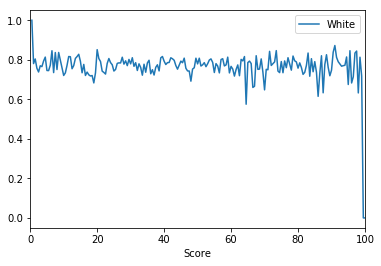

In [100]:
pis.plot()

In [108]:
pis.head()

,White
Score,
0.0,NaN
0.5,1.000000
1.0,0.780760
1.5,0.804133
2.0,0.757152


In [115]:
tmp = whitePi.to_frame()
tmp.columns = ['White']
tmp.head()

,White
Score,
0.0,0.000000
0.5,0.786325
1.0,0.777494
1.5,0.786885
2.0,0.774194


In [120]:
tmp.iloc[50], pis.iloc[50]

(White    0.703125
 Name: 25.0, dtype: float64, White    0.743002
 Name: 25.0, dtype: float64)

In [123]:
tmp.median(), pis.median()

(White    0.733333
 dtype: float64, White    0.773327
 dtype: float64)

In [117]:
# for race in ["White", "Black", "Hispanic", "Asian"]:
print(race, (tmp['White'] - pis['White']).abs().sum())

White 1608428438370.046


In [95]:
ProbNonDefaultGivenScoreEqualsXAndRace.columns = ['White', 'Black', 'Hispanic', 'Asian']

In [96]:
FigureSixA = ProbNonDefaultGivenScoreEqualsXAndRace
(-FigureSixA[['White']] * FigureSevenAD[['White']]) / ((FigureSixA[['White']] * FigureSevenAND[['White']]) - FigureSevenAND[['White']] - (FigureSixA[['White']] * FigureSevenAD[['White']]))

,White
Score,
0.0,NaN
0.5,NaN
1.0,0.796802
1.5,0.795510
2.0,0.835083
2.5,0.849336
3.0,0.826598
3.5,0.832097
4.0,0.814038


<hr/>

# Calculating P(NonDefault | race) - pi values
- Named ProbNonDefaultGivenRace.csv

In [17]:
def getPisNonCumulative(dataset, raceSet, goodName, badName):
    good = dataset.set_index("Score")[goodName].diff().fillna(value=0)
    bad = dataset.set_index("Score")[badName].diff().fillna(value=0)
    total = raceSet.set_index("Score")["Percentage"].diff().fillna(value=0)
    return ((total - bad) / (good - bad)).fillna(value=0)

In [18]:
# Get the dataframe that holds the cumulative percentage, by demographic group
# This function is just for reorganizing the given data
def getPD(data, col, raceName):
    pd = data["Score"].to_frame(name="Score")
    race = np.full(len(data), raceName)
    pd["Demographic"] = race
    pd["Percentage"] = data[col]
    return pd

whites = getPD(CumulativePercentageByDemographic, "White", "white")
blacks = getPD(CumulativePercentageByDemographic, "Black", "black")
asians = getPD(CumulativePercentageByDemographic, "Asian", "asian")
hispanics = getPD(CumulativePercentageByDemographic, "Hispanic", "hispanic")

In [19]:
whitePi = getPisNonCumulative(CumulativePercentageByDefaulters, whites, "White (NonDefault)", "White (Default)")
blackPi = getPisNonCumulative(CumulativePercentageByDefaulters, blacks, "Black (NonDefault)", "Black (Default)")
asianPi = getPisNonCumulative(CumulativePercentageByDefaulters, asians, "Asian (NonDefault)", "Asian (Default)")
hispanicPi = getPisNonCumulative(CumulativePercentageByDefaulters, hispanics, "Hispanic (NonDefault)", "Hispanic (Default)")

In [20]:
whitePi[50], blackPi[50], asianPi[50], hispanicPi[50]

(0.77551020408163152,
 0.29896907216495305,
 0.80645161290323375,
 0.54545454545453709)

In [21]:
# hardcoded pi values to account for rounding error
# Right now, if I use the hard coded rounded values I get the closest to the correct solution

# old rounded pi values
# pis = [0.759185,0.315164,0.550595,0.80066]

#new rounded pi values
pis = [0.749999,0.329064,0.550595,0.80066]

# These are the real values
# pis = [whitePi[50], blackPi[50], hispanicPi[50], asianPi[50]]
ProbNonDefaultGivenRace = pd.DataFrame(data=[pis], columns=['white', 'black', 'hispanic', 'asian'])
ProbNonDefaultGivenRace.set_index("white").to_csv("ProbNonDefaultGivenRace.csv")

<hr/>

# Calculating P(NonDefault | Score=x, race) and P(Default | Score=x, race)

<h2 align='center'>$\frac{pi * P(Score=x | NonDefault)}{pi * P(Score=x|NonDefault) + (1-pi) * P(Score=x | Default)}$</h2>
- from our discussion / email about Bayes' Rule on April 10th
- CumulativePercentageByDefaulters (from Figure 7A) gives us P(Score>=x | NonDefault) and P(Score>=x | Default).
- https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables7.htm#d7A
- Using diff(), we can obtain P(Score=x|NonDefault) and P(Score=x|Default).
- Together, with the pi values calculated above. We have the necessary requirements to calculate P(NonDefault | Score=x)

In [ ]:
def getPiFromProbNonDefaultGivenScoreEqualsX(dataset, names):
    

In [27]:
def getProbDefOrNotGivenScoreEqualsX(dataset, names, pis):
    probabilities = pd.DataFrame(index=dataset.index)
    for i in range(len(names)):
        nonDefault = dataset[names[i] + ' (NonDefault)'].diff().fillna(value=0)
        default = dataset[names[i] + ' (Default)'].diff().fillna(value=0)
        finalProbability = (
            (pis[i] * nonDefault) / ((pis[i] * nonDefault) + ((1 - pis[i])*(default))))
        probabilities['P(NonDefault|Score=x, ' + names[i] + ')'] = finalProbability.fillna(value=0)
        probabilities['P(Default|Score=x, ' + names[i] + ')'] = (1 - finalProbability.fillna(value=0))
    probabilities['Score'] = dataset.index
    return probabilities.set_index('Score')

In [28]:
ProbDefOrNotGivenScoreEqualsXAndRace = getProbDefOrNotGivenScoreEqualsX(
    CumulativePercentageByDefaulters.set_index('Score'),
    ["White", "Black", "Hispanic", "Asian"],
    pis)

In [29]:
ProbDefOrNotGivenScoreEqualsXAndRace.head()

,"P(NonDefault|Score=x, White)","P(Default|Score=x, White)","P(NonDefault|Score=x, Black)","P(Default|Score=x, Black)","P(NonDefault|Score=x, Hispanic)","P(Default|Score=x, Hispanic)","P(NonDefault|Score=x, Asian)","P(Default|Score=x, Asian)"
Score,,,,,,,,
0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
0.5,0.000000,1.000000,0.005191,0.994809,0.021042,0.978958,0.000000,1.000000
1.0,0.022332,0.977668,0.025054,0.974946,0.011400,0.988600,0.058622,0.941378
1.5,0.023809,0.976191,0.021218,0.978782,0.000000,1.000000,0.000000,1.000000
2.0,0.036810,0.963190,0.023518,0.976482,0.025943,0.974057,0.101215,0.898785


<hr/>

# Creating P(race)
- taken from Table 9. 
- https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/datamodel_tables.htm

In [30]:
sizes = [133165, 18274, 14702, 7906]
total = sum(sizes)
ProbOfBeingRace = pd.DataFrame(
    { 
    'Demographic' : ['white', 'black', 'hispanic', 'asian'],
    'P(race)' : [sizes[0]/total, sizes[1]/total, sizes[2]/total, sizes[3]/total]
    },
    columns=["Demographic", "P(race)"]
)

ProbOfBeingRace.set_index('Demographic').to_csv('ProbOfBeingRace.csv')

<hr/>

# Creating P(Score=x | race)
- taken from Table 3A. 
- https://www.federalreserve.gov/boarddocs/rptcongress/creditscore/figtables3.htm#d3A
- using the diff values

In [31]:
# used to be ProbOfBeingScore
# I'll give them this in a csv
ProbScoreEqualsXGivenRace = (
    pd.read_csv("figure3A.csv")
    .set_index(["Score"]).diff().fillna(0) / 100
)

ProbScoreEqualsXGivenRace.to_csv('ProbScoreEqualsXGivenRace.csv')

In [32]:
ProbScoreEqualsXGivenRace.head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,0.0000,0.0000,0.0000,0.0000
0.5,0.0025,0.0112,0.0046,0.0013
1.0,0.0090,0.0414,0.0175,0.0075
1.5,0.0027,0.0114,0.0052,0.0019
2.0,0.0037,0.0142,0.0075,0.0025


In [33]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
ProbFromOther = pd.read_csv('ProbScoreEqualsXGivenRace-old.csv').set_index("TransRisk Score")
ProbFromOther.index.names = ["Score"]

for race in ["White", "Black", "Hispanic", "Asian"]:
    print(race, (ProbFromOther[race.lower()] - ProbScoreEqualsXGivenRace[race]).abs().sum())

White 5.692061405548898e-17
Black 4.7488055154865094e-17
Hispanic 5.800481622797449e-17
Asian 5.117434254131581e-17


<hr/>

# Calculating P(score=x | NonDefault, race)

### P(score=x | NonDefault, race) = P(score=x & NonDefault & race) / P(NonDefault and race)
<hr/>
### Step 1:
### P(score=x & NonDefault & race ) = P(race & score=x) * P(NonDefault | race, score=x)
###  P(score=x & NonDefault & race ) = P(race) * P(score=x | race) * P(NonDefault | race, score=x)
<hr/>
### Step 2:
### P(NonDefault and race) = P(race) * P(NonDefault | race)
<hr/>
### Step 3:
### Step 1 / Step2
### P(score=x | NonDefault, race) = P(score=x & NonDefault & race) / P(NonDefault and race)
<hr/>

## Step 1: Calculate P(Score=x & NonDefault & race)

In [34]:
ProbOfBeingRace.set_index('Demographic', inplace=True)

In [35]:
ProbScoreEqualsXGivenRace.head()

,White,Black,Hispanic,Asian
Score,,,,
0.0,0.0000,0.0000,0.0000,0.0000
0.5,0.0025,0.0112,0.0046,0.0013
1.0,0.0090,0.0414,0.0175,0.0075
1.5,0.0027,0.0114,0.0052,0.0019
2.0,0.0037,0.0142,0.0075,0.0025


In [36]:
ProbRaceAndScoreEqualsX = pd.DataFrame({
    'white': ProbOfBeingRace.loc['white']['P(race)'] * ProbScoreEqualsXGivenRace['White'],
    'asian': ProbOfBeingRace.loc['asian']['P(race)'] * ProbScoreEqualsXGivenRace['Asian'],
    'black': ProbOfBeingRace.loc['black']['P(race)'] * ProbScoreEqualsXGivenRace['Black'],
    'hispanic': ProbOfBeingRace.loc['hispanic']['P(race)'] * ProbScoreEqualsXGivenRace['Hispanic'],
})

In [37]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
ProbFromOther = pd.read_csv('ProbRaceAndScoreEqualsX.csv').set_index("TransRisk Score")
ProbFromOther.index.names = ["Score"]
for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race.lower()] - ProbRaceAndScoreEqualsX[race]).abs().sum())

white 3.5344990823027445e-17
black 5.89534931288993e-18
hispanic 4.929731753020028e-18
asian 2.778268066994105e-18


In [38]:
ProbNonDefaultGivenScoreEqualsXAndRace = (
    ProbDefOrNotGivenScoreEqualsXAndRace[['P(NonDefault|Score=x, White)', 
                                 'P(NonDefault|Score=x, Black)',
                                'P(NonDefault|Score=x, Hispanic)',
                                'P(NonDefault|Score=x, Asian)']])

In [39]:
ProbNonDefaultGivenScoreEqualsXAndRace.head()

,"P(NonDefault|Score=x, White)","P(NonDefault|Score=x, Black)","P(NonDefault|Score=x, Hispanic)","P(NonDefault|Score=x, Asian)"
Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.005191,0.021042,0.000000
1.0,0.022332,0.025054,0.011400,0.058622
1.5,0.023809,0.021218,0.000000,0.000000
2.0,0.036810,0.023518,0.025943,0.101215


In [40]:
ProbScoreEqualsXAndGoodAndRace = pd.DataFrame(index=ProbRaceAndScoreEqualsX.index)
ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and White)'] = (
    ProbRaceAndScoreEqualsX['white'] * ProbNonDefaultGivenScoreEqualsXAndRace['P(NonDefault|Score=x, White)'])
ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and Black)'] = (
    ProbRaceAndScoreEqualsX['black'] * ProbNonDefaultGivenScoreEqualsXAndRace['P(NonDefault|Score=x, Black)'])
ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and Hispanic)'] = (
    ProbRaceAndScoreEqualsX['hispanic'] * ProbNonDefaultGivenScoreEqualsXAndRace['P(NonDefault|Score=x, Hispanic)'])
ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and Asian)'] = (
    ProbRaceAndScoreEqualsX['asian'] * ProbNonDefaultGivenScoreEqualsXAndRace['P(NonDefault|Score=x, Asian)'])
# i'll give them this in a csv I think
ProbScoreEqualsXAndGoodAndRace.head()

,P(Score=x and NonDefault and White),P(Score=x and NonDefault and Black),P(Score=x and NonDefault and Hispanic),P(Score=x and NonDefault and Asian)
Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.000006,0.000008,0.000000
1.0,0.000154,0.000109,0.000017,0.000020
1.5,0.000049,0.000025,0.000000,0.000000
2.0,0.000104,0.000035,0.000016,0.000011


In [41]:
# this column renaming is here just here for comparisons with the old data frames right now
ProbScoreEqualsXAndGoodAndRace.columns=['white', 'black', 'hispanic', 'asian']
ProbNonDefaultGivenScoreEqualsXAndRace.columns=['white', 'black', 'hispanic', 'asian']

In [42]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
# This one is going to differ because the old datasets used the rounded pi values for half of the 
# calculations and the real pi values for the rest of them. Here is where the differences begin.
ProbFromOther = pd.read_csv("ProbGoodGivenRaceAndScoreEqualsX.csv").set_index("TransRisk Score")
ProbFromOther.index.names = ["Score"]
for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race] - ProbNonDefaultGivenScoreEqualsXAndRace[race]).abs().sum())

white 2.5885872268751196
black 3.045147395643465
hispanic 0.435021444073187
asian 0.6736285216007927


In [51]:
NewProbNonDefaultGivenScoreEqualsX.index.names=['TransRisk Score']
NewProbNonDefaultGivenScoreEqualsX.head()

,White,Black,Hispanic,Asian
TransRisk Score,,,,
0.0,0.0146,0.0033,0.0095,0.0523
0.5,0.0205,0.0077,0.0151,0.0552
1.0,0.0264,0.0120,0.0207,0.0581
1.5,0.0323,0.0164,0.0262,0.0610
2.0,0.0382,0.0207,0.0318,0.0639


In [53]:
ProbNonDefaultGivenScoreEqualsXAndRace.head()

,white,black,hispanic,asian
Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.005191,0.021042,0.000000
1.0,0.022332,0.025054,0.011400,0.058622
1.5,0.023809,0.021218,0.000000,0.000000
2.0,0.036810,0.023518,0.025943,0.101215


In [52]:
for race in ["White", "Black", "Hispanic", "Asian"]:
    print(race, (NewProbNonDefaultGivenScoreEqualsX[race] - ProbNonDefaultGivenScoreEqualsXAndRace[race.lower()]).abs().sum())

White 3.546580908701498
Black 8.201638298982568
Hispanic 7.862243504136284
Asian 8.170012434028312


In [54]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
# This one is going to differ because the old datasets used the rounded pi values for half of the 
# calculations and the real pi values for the rest of them.
ProbFromOther = pd.read_csv('P(score=xandgoodandrace).csv').set_index("TransRisk Score")
ProbFromOther.index.names = ["Score"]

for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race] - ProbScoreEqualsXAndGoodAndRace[race]).abs().sum())

white 0.00922165005168145
black 0.001619084154532487
hispanic 0.0002221191745514134
asian 0.0001410411201749315


In [55]:
# Renaming columns again now that comparison with old datasets is done
ProbScoreEqualsXAndGoodAndRace.columns=['P(Score=x and NonDefault and White)',
                                        'P(Score=x and NonDefault and Black)',
                                        'P(Score=x and NonDefault and Hispanic)',
                                        'P(Score=x and NonDefault and Asian)']

## Step 2: Calculate P(NonDefault and race)

In [56]:
#Error checking:

# At this point, the old tutorial switched to using the rounded values (even though everything
# prior was done with the REAL values)
# If I switch to using the ROUNDED (hard coded) values here, I match the old datasets, BUT I get the wrong solution...
# In conclusion:
# What yields the closest solution currently is choosing the ROUNDED (hard coded) values for all of the
# calculations, though it does make the Asian threshold higher than the White threshold in the final answer
# From here on out, the datasets from the old and new are going to differ because of this.

pd.read_csv("ProbGoodGivenRace.csv").head()

,white,black,hispanic,asian
0,0.759185,0.315164,0.550595,0.80066


In [57]:
ProbNonDefaultGivenRace.head()

,white,black,hispanic,asian
0,0.749999,0.329064,0.550595,0.80066


## Uncomment the line of code below if you'd like to see the old and new datasets being the same after switching to the rounded pi values half way through:

In [58]:
# ProbNonDefaultGivenRace = pd.read_csv("ProbGoodGivenRace.csv")

# ------------------------------

In [59]:
ProbNonDefaultAndRace = pd.DataFrame({
    'white': ProbOfBeingRace.loc['white']['P(race)'] * ProbNonDefaultGivenRace['white'],
    'asian': ProbOfBeingRace.loc['asian']['P(race)'] * ProbNonDefaultGivenRace['asian'],
    'black': ProbOfBeingRace.loc['black']['P(race)'] * ProbNonDefaultGivenRace['black'],
    'hispanic': ProbOfBeingRace.loc['hispanic']['P(race)'] * ProbNonDefaultGivenRace['hispanic'],
})

In [60]:
# I'll give them this csv I think
ProbNonDefaultAndRace

,asian,black,hispanic,white
0,0.03637,0.03455,0.04651,0.573831


## Step 3: Calculate P(Score=x | NonDefault, race)

In [61]:
ProbScoreEqualsXGivenNonDefaultAndRace = pd.DataFrame({
    'white': ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and White)'] / ProbNonDefaultAndRace['white'].values[0],
    'asian': ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and Asian)'] / ProbNonDefaultAndRace['asian'].values[0],
    'black': ProbScoreEqualsXAndGoodAndRace['P(Score=x and NonDefault and Black)'] / ProbNonDefaultAndRace['black'].values[0],
    'hispanic': ProbScoreEqualsXAndGoodAndRace ['P(Score=x and NonDefault and Hispanic)'] / ProbNonDefaultAndRace['hispanic'].values[0],
})


ProbScoreEqualsXGivenNonDefaultAndRace.head()

,asian,black,hispanic,white
Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.000177,0.000176,0.000000
1.0,0.000549,0.003152,0.000362,0.000268
1.5,0.000000,0.000735,0.000000,0.000086
2.0,0.000316,0.001015,0.000353,0.000182


In [62]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
# This one is going to differ because the old datasets used the rounded pi values for half of the 
# calculations and the real pi values for the rest of them.
ProbFromOther = pd.read_csv('ProbScoreEqualsXGivenGoodAndRace.csv').set_index("TransRisk Score")
ProbFromOther.index.names = ["Score"]
for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race.lower()] - ProbScoreEqualsXGivenNonDefaultAndRace[race]).abs().sum())

white 0.015023696144532585
black 0.03326833147188532
hispanic 0.004775775586353237
asian 0.0038779959232669086


<hr/>

# Calculating P(Score>=x | NonDefault, race)

In [63]:
ProbScoreGreaterThanXGivenNonDefaultAndRace = ProbScoreEqualsXGivenNonDefaultAndRace.iloc[::-1].cumsum()[::-1]
ProbScoreGreaterThanXGivenNonDefaultAndRace.head()

,asian,black,hispanic,white
Score,,,,
0.0,0.996122,1.004620,1.004775,0.996178
0.5,0.996122,1.004620,1.004775,0.996178
1.0,0.996122,1.004443,1.004600,0.996178
1.5,0.995573,1.001291,1.004237,0.995910
2.0,0.995573,1.000556,1.004237,0.995824


<hr/>

# Calculating P(NonDefault | Score=>x, race)
### Should match ProbLoanReceiverIsGood.csv

<h2 align='center'>$\frac{P(NonDefault and Score>=x | race)}{P(Score>=x | race)}$</h2>

** P(NonDefault | Score=x, race) **
- calculated earlier in this notebook
- ProbNonDefaultGivenScoreEqualsXAndRace

** P(NonDefault and Score=x | race) = P(NonDefault | Score=x, race) * P(Score=x | race) **
- ProbNonDefaultGivenScoreEqualsXAndRace * ProbScoreEqualsXAndRace (calculated above)
- we can use cumsum() on the reverse of this to obtain P(NonDefault and Score>=x | race)

** P(NonDefault and Score>=x | race) **
- ProbNonDefaultAndScoreGreaterXGivenRace
- see above for how to calculate this

** P(Score>=x | race) **
- We already calculated P(Score=x | race), we can use cumsum() on the reverse of ProbScoreEqualsXGivenRace to obtain this

In [64]:
ProbNonDefaultGivenScoreEqualsXAndRace.head()

,white,black,hispanic,asian
Score,,,,
0.0,0.000000,0.000000,0.000000,0.000000
0.5,0.000000,0.005191,0.021042,0.000000
1.0,0.022332,0.025054,0.011400,0.058622
1.5,0.023809,0.021218,0.000000,0.000000
2.0,0.036810,0.023518,0.025943,0.101215


### Step 1:

** P(NonDefault and Score=x | race) = P(NonDefault | Score=x, race) * P(Score=x | race) **

In [65]:
ProbScoreEqualsXGivenRace.columns = [x.lower() for x in ProbScoreEqualsXGivenRace.columns]
ProbNonDefaultAndScoreEqualsXGivenRace = (
    ProbScoreEqualsXGivenRace[['asian', 'black', 'hispanic', 'white']] * 
    ProbNonDefaultGivenScoreEqualsXAndRace[['asian', 'black', 'hispanic', 'white']])
ProbNonDefaultAndScoreGreaterXGivenRace = (
    ProbNonDefaultAndScoreEqualsXGivenRace.iloc[::-1].cumsum()[::-1])

### Step 2:

Take the cumsum of the reverse of P(Score=x | race) to obtain:
** P(Score>=x | race) **

In [66]:
ProbScoreGreaterXGivenRace = ProbScoreEqualsXGivenRace.iloc[::-1].cumsum()[::-1]

In [67]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
ProbFromOther = pd.read_csv("ProbScoreGreaterThanXGivenRace.csv").set_index("TransRisk Score")
ProbFromOther.index.names = ['Score']

for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race] - ProbScoreGreaterXGivenRace[race]).abs().sum())

white 2.5400688496990398e-15
black 9.074772183703672e-16
hispanic 1.916869440954372e-15
asian 4.121919819355391e-15


In [68]:
ProbNonDefaultAndScoreGreaterXGivenRace.head()

,asian,black,hispanic,white
Score,,,,
0.0,0.797555,0.330584,0.553224,0.747132
0.5,0.797555,0.330584,0.553224,0.747132
1.0,0.797555,0.330526,0.553127,0.747132
1.5,0.797115,0.329489,0.552928,0.746931
2.0,0.797115,0.329247,0.552928,0.746867


In [69]:
ProbScoreGreaterXGivenRace.head()

,white,black,hispanic,asian
Score,,,,
0.0,0.9999,0.9993,0.9999,1.0000
0.5,0.9999,0.9993,0.9999,1.0000
1.0,0.9974,0.9881,0.9953,0.9987
1.5,0.9884,0.9467,0.9778,0.9912
2.0,0.9857,0.9353,0.9726,0.9893


### Step 3:

** P(NonDefault | Score>=x and Race) = P(NonDefault and Score>=x | Race) / P(Score>=x | race) **

In [70]:
ProbNonDefaultGivenScoreGreaterXAndRace = (
    ProbNonDefaultAndScoreGreaterXGivenRace / ProbScoreGreaterXGivenRace)

In [71]:
ProbNonDefaultGivenScoreGreaterXAndRace.head()

,asian,black,hispanic,white
Score,,,,
0.0,0.797555,0.330816,0.553280,0.747207
0.5,0.797555,0.330816,0.553280,0.747207
1.0,0.798593,0.334507,0.555739,0.749080
1.5,0.804192,0.348039,0.565482,0.755697
2.0,0.805737,0.352023,0.568505,0.757702


In [72]:
# Cross checking to ensure it matches the old dataset from the calculations done in the winter
ProbFromOther = pd.read_csv('ProbLoanReceiverIsGood.csv').set_index("TransRisk Score")
ProbFromOther.index.names = ['Score']

for race in ["white", "black", "hispanic", "asian"]:
    print(race, (ProbFromOther[race.lower()] - ProbNonDefaultGivenScoreGreaterXAndRace[race]).abs().sum())

white 1.1819987812316435
black 2.5465616683703924
hispanic 0.3104417082944061
asian 0.31849800731071864


In [43]:
ProbNonDefaultGivenScoreGreaterXAndRace.index.rename('TransRisk Score', inplace=True)

In [44]:
# THEY ARE GIVEN THIS CSV IN THE TUTORIAL
ProbNonDefaultGivenScoreGreaterXAndRace.to_csv('ProbNonDefaultGivenScoreGreaterXAndRace.csv')